In [1]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

from nltk.tokenize import TweetTokenizer

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

In [3]:
tweets_df = pd.read_csv('dataset2.csv')
tweets_df.head()

,Datetime,user_name,user_location,user_description,tweet,sentiment
0,2020-03-25 06:36:25+00:00,TickWatcher,"California, USA","Update for stock earnings, dividend, money flo...","$DG #Dollar General #Options #maxpain Chart, O...",Positive
1,2020-03-25 06:18:32+00:00,Vista Partners LLC,"San Francisco, CA","CA Registered Investment Advisor, Publishes FR...",“Education is not only a ladder of opportunity...,Neutral
2,2020-03-25 06:05:46+00:00,Capt. Investo,"St Petersburg, FL",“The quickest way to double your money is to f...,$GCLT news coming soon #fintech #finance https...,Neutral
3,2020-03-25 06:35:29+00:00,FFL Tribe,"Austin, TX",The Tribe - Family First Life agents on a miss...,That amazing feeling when you finally close a ...,Positive
4,2020-03-25 06:15:49+00:00,inter_mkt,France,cbpassiveincomes #trading #forex #bitcoin #tra...,From OHM to SHIB: 5 Most Impressive Altcoins o...,Positive


In [4]:
tweets_df.shape

(12524, 6)

In [5]:
tweets_df.drop_duplicates(subset = ['tweet'], inplace = True)
tweets_df.head()

,Datetime,user_name,user_location,user_description,tweet,sentiment
0,2020-03-25 06:36:25+00:00,TickWatcher,"California, USA","Update for stock earnings, dividend, money flo...","$DG #Dollar General #Options #maxpain Chart, O...",Positive
1,2020-03-25 06:18:32+00:00,Vista Partners LLC,"San Francisco, CA","CA Registered Investment Advisor, Publishes FR...",“Education is not only a ladder of opportunity...,Neutral
2,2020-03-25 06:05:46+00:00,Capt. Investo,"St Petersburg, FL",“The quickest way to double your money is to f...,$GCLT news coming soon #fintech #finance https...,Neutral
3,2020-03-25 06:35:29+00:00,FFL Tribe,"Austin, TX",The Tribe - Family First Life agents on a miss...,That amazing feeling when you finally close a ...,Positive
4,2020-03-25 06:15:49+00:00,inter_mkt,France,cbpassiveincomes #trading #forex #bitcoin #tra...,From OHM to SHIB: 5 Most Impressive Altcoins o...,Positive


In [6]:
tweets_df.dropna(inplace = True)
tweets_df.head()

,Datetime,user_name,user_location,user_description,tweet,sentiment
0,2020-03-25 06:36:25+00:00,TickWatcher,"California, USA","Update for stock earnings, dividend, money flo...","$DG #Dollar General #Options #maxpain Chart, O...",Positive
1,2020-03-25 06:18:32+00:00,Vista Partners LLC,"San Francisco, CA","CA Registered Investment Advisor, Publishes FR...",“Education is not only a ladder of opportunity...,Neutral
2,2020-03-25 06:05:46+00:00,Capt. Investo,"St Petersburg, FL",“The quickest way to double your money is to f...,$GCLT news coming soon #fintech #finance https...,Neutral
3,2020-03-25 06:35:29+00:00,FFL Tribe,"Austin, TX",The Tribe - Family First Life agents on a miss...,That amazing feeling when you finally close a ...,Positive
4,2020-03-25 06:15:49+00:00,inter_mkt,France,cbpassiveincomes #trading #forex #bitcoin #tra...,From OHM to SHIB: 5 Most Impressive Altcoins o...,Positive


In [7]:
tweets_df.shape

(12524, 6)

In [8]:
def TextClean(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r'@[a-z0-9_]\S+', '', tweet)
    tweet = re.sub(r'#[a-z0-9_]\S+', '', tweet)
    tweet = re.sub(r'&[a-z0-9_]\S+', '', tweet)
    tweet = re.sub(r'[?!.+,;$%&"]+', '', tweet)
    tweet = re.sub(r'rt[\s]+', '', tweet)
    tweet = re.sub(r'\d+', '', tweet)
    tweet = re.sub(r'\$', '', tweet)
    tweet = re.sub(r'rt+', '', tweet)
    tweet = re.sub(r'https?:?\/\/\S+', '', tweet)
    
    return tweet

In [9]:
tweets_df['Datetime'] = pd.to_datetime(tweets_df['Datetime'])
tweets_df.set_index('Datetime', inplace = True)
tweets_df.drop_duplicates(subset = ['tweet'], inplace = True)
tweets_df['CleanTweet'] = tweets_df['tweet'].apply(TextClean)
tweet_tokenizer = TweetTokenizer()
tweets_df['CleanTweet'] = tweets_df['CleanTweet'].apply(tweet_tokenizer.tokenize)
tweets_df['CleanTweet'] = [', '.join(map(str, token)) for token in tweets_df['CleanTweet']]
#tweets_df.to_csv(key_word + '.csv', encoding='utf-8')
    
  

# Vader and TextBlob Sentiment Polarity Score

In [10]:
def vader_compound_score(tweet):
    vader = SentimentIntensityAnalyzer()
    if vader.polarity_scores(tweet)['compound'] >= 0.05:
        return 'Positive'
    elif vader.polarity_scores(tweet)['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'
    
def textblob_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [11]:
tweets_df['Vader_sent'] = tweets_df['CleanTweet'].apply(vader_compound_score)
tweets_df['TextBlob_sent'] = tweets_df['CleanTweet'].apply(textblob_sentiment)
tweets_df['Different_sent'] = np.where(tweets_df['Vader_sent'] == tweets_df['TextBlob_sent'], 1, 0)
tweets_df.to_csv('head.csv', encoding='utf-8')

In [12]:
tweets_df.head()

,user_name,user_location,user_description,tweet,sentiment,CleanTweet,Vader_sent,TextBlob_sent,Different_sent
Datetime,,,,,,,,,
2020-03-25 06:36:25+00:00,TickWatcher,"California, USA","Update for stock earnings, dividend, money flo...","$DG #Dollar General #Options #maxpain Chart, O...",Positive,"dg, general, chaopen, interest, chaupdate",Positive,Positive,1
2020-03-25 06:18:32+00:00,Vista Partners LLC,"San Francisco, CA","CA Registered Investment Advisor, Publishes FR...",“Education is not only a ladder of opportunity...,Neutral,"“, education, is, not, only, a, ladder, of, op...",Neutral,Neutral,1
2020-03-25 06:05:46+00:00,Capt. Investo,"St Petersburg, FL",“The quickest way to double your money is to f...,$GCLT news coming soon #fintech #finance https...,Neutral,"gclt, news, coming, soon",Neutral,Neutral,1
2020-03-25 06:35:29+00:00,FFL Tribe,"Austin, TX",The Tribe - Family First Life agents on a miss...,That amazing feeling when you finally close a ...,Positive,"that, amazing, feeling, when, you, finally, cl...",Positive,Positive,1
2020-03-25 06:15:49+00:00,inter_mkt,France,cbpassiveincomes #trading #forex #bitcoin #tra...,From OHM to SHIB: 5 Most Impressive Altcoins o...,Positive,"from, ohm, to, shib, :, most, impressive, altc...",Positive,Positive,1


In [13]:
#Visualisation
vader_pie = [len(tweets_df[tweets_df['Vader_sent'] == 'Positive']), 
             len(tweets_df[tweets_df['Vader_sent'] == 'Negative']), 
             len(tweets_df[tweets_df['Vader_sent'] == 'Neutral'])]
blob_pie = [len(tweets_df[tweets_df['TextBlob_sent'] == 'Positive']), 
            len(tweets_df[tweets_df['TextBlob_sent'] == 'Negative']), 
            len(tweets_df[tweets_df['TextBlob_sent'] == 'Neutral'])]
labels = ['Positive', 'Negative', 'Neutral']
colors = ['aquamarine', 'tomato', 'skyblue']

7643 times two approaches show different results


Text(0.5, 1.0, 'TextBlob')

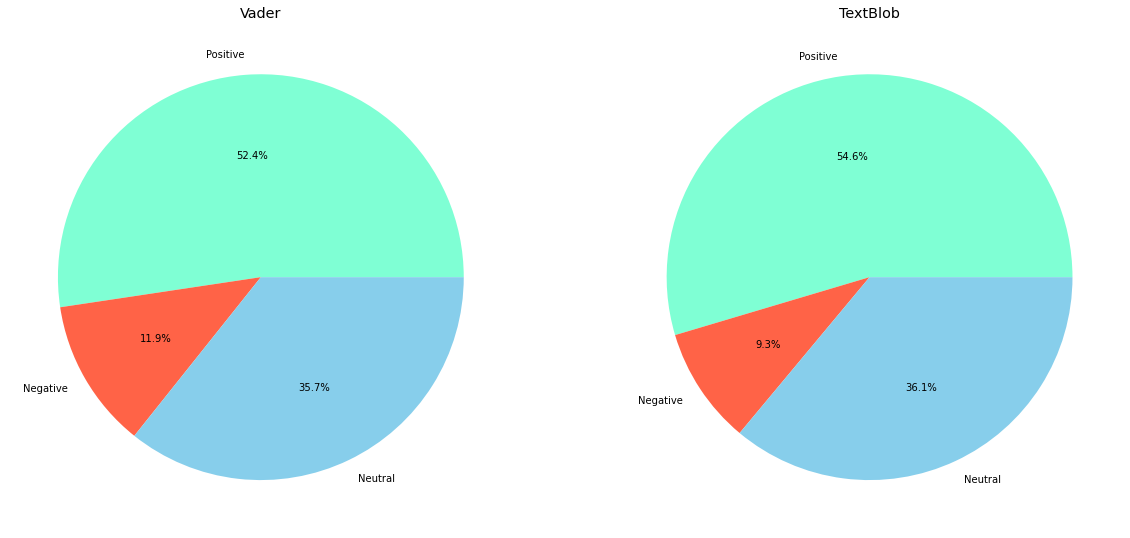

In [14]:
print(len(tweets_df[tweets_df['Different_sent'] == 1]), 'times two approaches show different results')

plt.style.use('ggplot')
plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 1)
plt.pie(vader_pie, labels = labels, colors = colors, autopct = '%1.1f%%')
plt.title('Vader')

plt.subplot(1, 2, 2)
plt.pie(blob_pie, labels = labels, colors = colors, autopct = '%1.1f%%')
plt.title('TextBlob')

In [15]:
print('Accuracy of Vader approach is:', (len(tweets_df[tweets_df['Different_sent'] == 1]) / len(tweets_df)) * 100, '%')

Accuracy of Vader approach is: 61.02682848930054 %
